In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

## Minimum Variance Portfolio Backtest.

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 100
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.STATIC_FACTOR_MODEL.value(
    factor_cov_estimator=CovEstimators.HISTORICAL.value(),
    residual_cov_estimator=CovEstimators.DIAG_HISTORICAL.value(),
    factors_selection=["spx"],
)

In [4]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [5]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [46:45<00:00,  9.91s/it]


StrategyStatistics:
* final_nav = 4.027991
* geom_avg_total_r = 0.076032
* geom_avg_xs_r = 0.068254
* std_xs_r = 0.165862
* min_xs_r = -0.085848
* max_xs_r = 0.098421
* skew = -0.046751
* kurtosis = 9.998010
* max_dd = -0.268667
* sharpe = 0.411508
* alpha_buy_hold = -0.001539
* tracking_error_buy_hold = 0.233594
* ir_buy_hold = -0.006590
* factor_loadings = {'low_risk': 1.161510285086747, 'momentum': -0.1136582330940124, 'quality': 0.12326562936669208, 'size': 0.02206514993008336, 'value': -0.44903774534538443, 'spx': 0.6812465476820271}
* alpha_benchmark = 0.001028
* alpha_benchmark_pvalue = 0.773202
* tracking_error_benchmark = 0.116098
* ir_benchmark = 0.008852
* ttest_pval = 0.569223
* levene_pval = 0.000000
* timing_ability_coef = -0.046048
* timing_ability_pval = 0.072115

In [6]:
result.std_xs_r, result.sharpe

(0.1658619984695255, 0.41150835445129186)

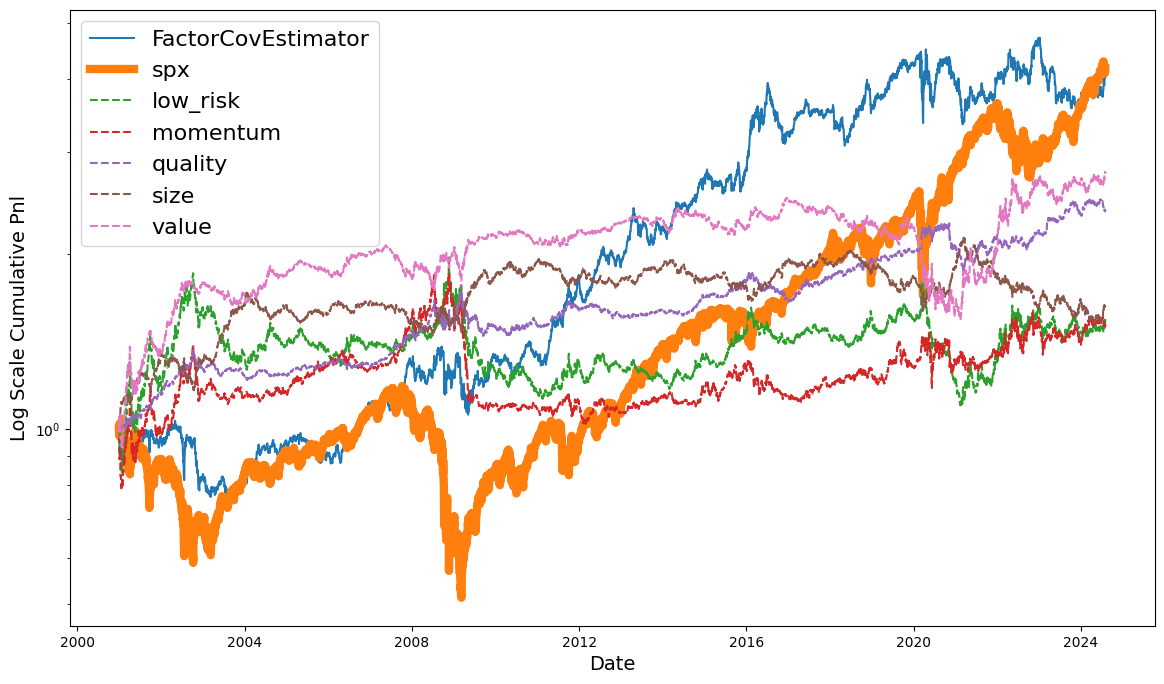

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

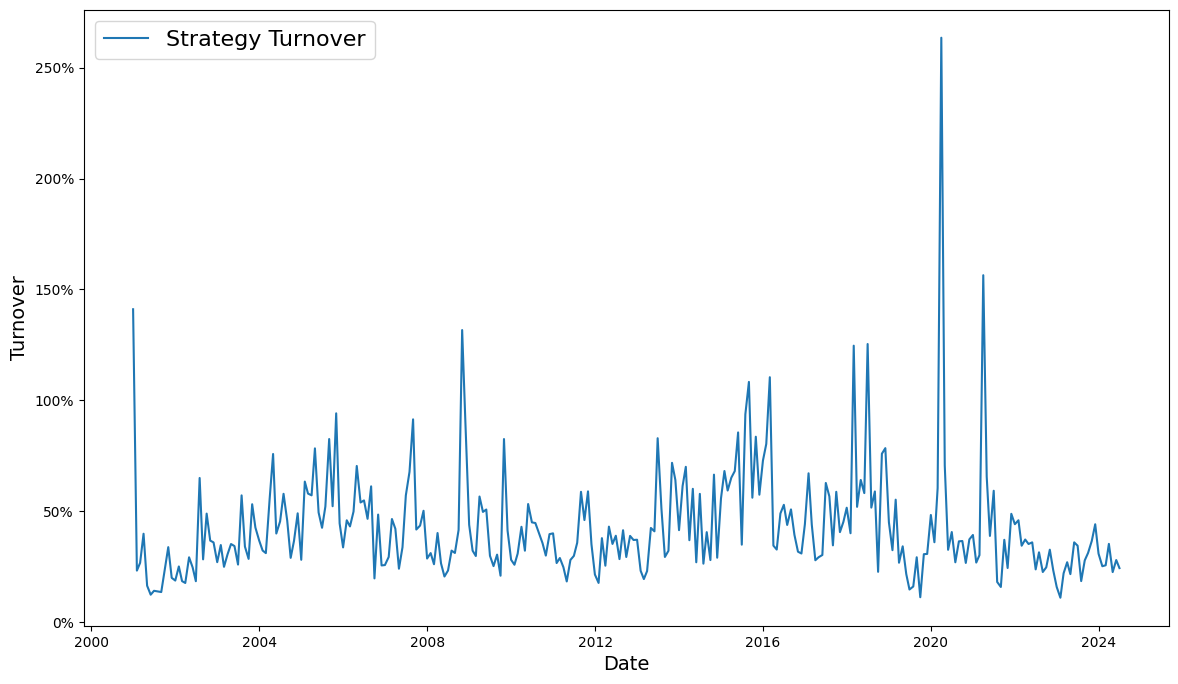

In [8]:
runner.plot_turnover()

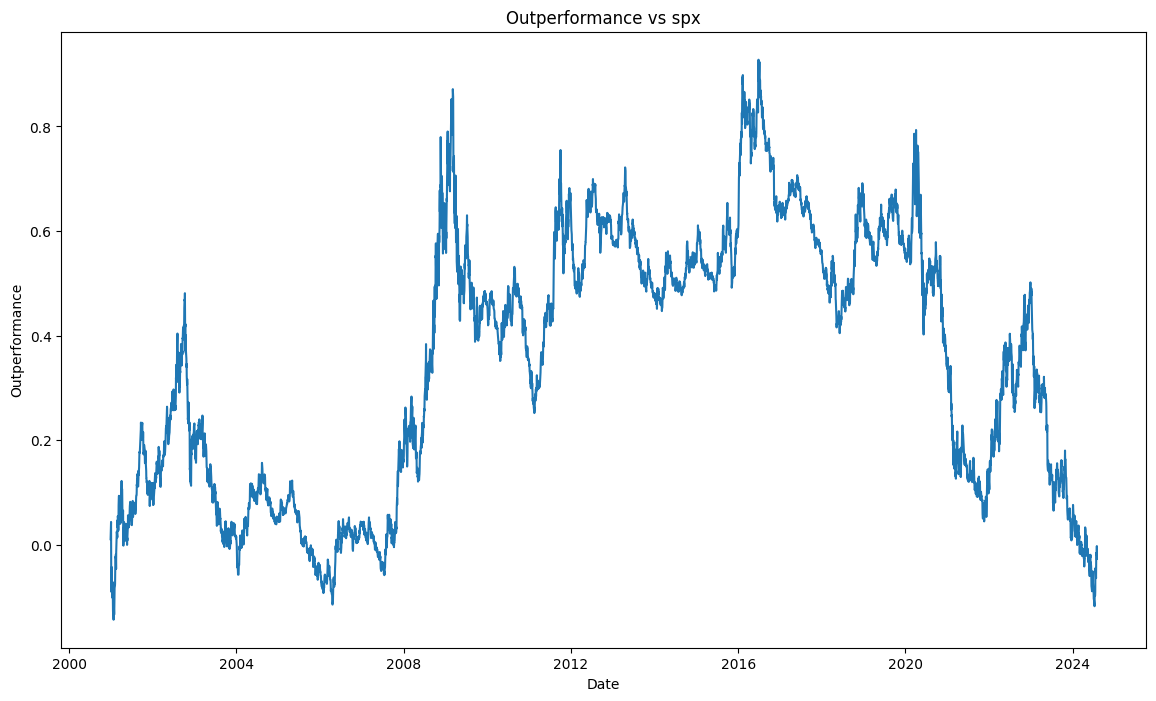

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")